# **Лабораторная работа №3**
## **Классификация**
## **Вариант 1: Авиакомпания**

**Цель работы**: изучить принципы решения задачи классификации
с использованием методов машинного обучения.
Выполним анализ набора данных: "Авиакомпания". Набор данных включает следующие атрибуты:
* Gender – пол пассажиров (женщины, мужчины)
* Customer Туре – тип клиента (лояльный клиент, нелояльный клиент)
* Age – возраст пассажиров
* Type of Travel – цель полета пассажиров (личные поездки, деловые поездки)
* Class – класс обслуживания пассажиров в самолете (Business, Eco, Eco Plus)
* Flight Distance – расстояние полета в рамках данного путешествия

* Inflight wifi service – уровень удовлетворенности услугой Wi–Fi во время по-
лета (0: неприменимо; 1–5)

* Departure/Arrival time convenient – уровень удовлетворенности удобным вре-
менем отправления/прибытия

* Ease of Online booking – уровень удовлетворенности онлайн-бронированием

* Gate location – уровень удовлетворенности местоположением выхода на по-
садку

* Food and drink – уровень удовлетворенности едой и напитками
* Online boarding – уровень удовлетворенности онлайн-посадкой
* Seat comfort – уровень удовлетворенности комфортом сидений
* Inflight entertainment – уровень удовлетворенности развлечениями в полете
* On–board service – уровень удовлетворенности обслуживанием на борту

* Leg room service – уровень удовлетворенности обслуживанием в номерах по-
вышенной комфортности

* Baggage handling – уровень удовлетворенности обработкой багажа
* Check–in service – уровень удовлетворенности обслуживанием на рейс
* Inflight service – уровень удовлетворенности обслуживанием в полете
* Cleanliness – уровень удовлетворенности чистотой
* Departure Delay in Minutes – задержка в минутах при вылете
* Arrival Delay in Minutes – задержка в минутах при прибытии
* Satisfaction – уровень удовлетворенности авиакомпанией (удовлетворен,
нейтральный или неудовлетворен) – целевая переменная




##1. Импортируем библиотеки и загружаем данные

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/ОмГТУ/3 курс/5 семак/Машинное обучение/airline.csv')
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


## 2. Выведем целевую переменную, целевые имена и частоту каждого уникального значения

In [ ]:
(unique, counts)=np.unique(df['satisfaction'], return_counts=True)
print('Уникальные значения целевой переменной: ',unique)
print('Количества целевой переменной: ', counts)

Уникальные значения целевой переменной:  ['neutral or dissatisfied' 'satisfied']
Количества целевой переменной:  [14573 11403]


## 3. Построим столбчатую диаграмму, чтобы увидеть целевую переменную

<Axes: xlabel='satisfaction', ylabel='count'>

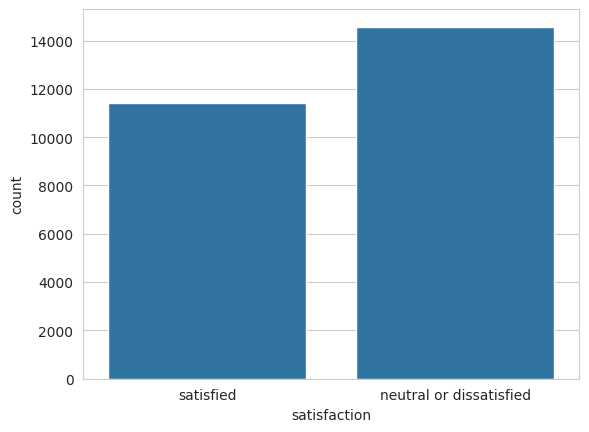

In [ ]:
sns.set_style('whitegrid')
sns.countplot(df, x = 'satisfaction')

Анализ диаграммы показывает, что набор данных является сбалансированным

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

## 4. Проверяем наличие пропущенных значений и выбросов

In [ ]:
print(df.isnull().sum())

Unnamed: 0                            0
id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0


<Axes: xlabel='Age'>

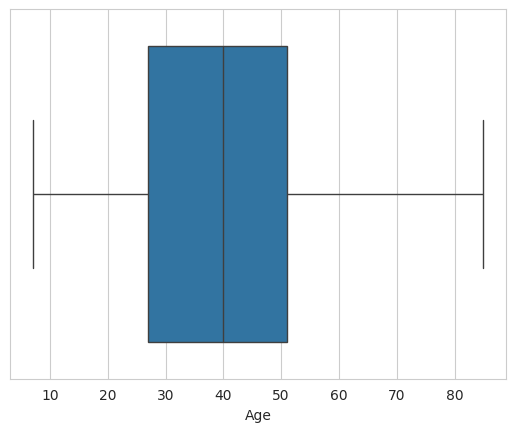

In [ ]:
sns.boxplot(x=df['Age'])

## 5. Исключим невлияющие категориальные признаки

In [ ]:
df_copy = df.copy()
cat_feat = ['Gender', 'Unnamed: 0']
df_copy.drop(cat_feat, axis = 1, inplace = True)
df_copy.head()

,id,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,19556,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,90035,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,12360,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,77959,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,36875,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


## 6.Разделяем данные на признаки и целевую переменную

In [ ]:
binary_satisfaction={'satisfied':1, 'neutral or dissatisfied':0}
df_copy['satisfaction']=df_copy['satisfaction'].map(binary_satisfaction)
df_copy.head()

,id,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,19556,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,1
1,90035,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,1
2,12360,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,0
3,77959,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,1
4,36875,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,1


In [ ]:

binary_loalty={'Loyal Customer':1, 'disloyal Customer':0}
df_copy['Customer Type']=df_copy['Customer Type'].map(binary_loalty)
df_copy.head()

,id,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,19556,1,52,Business travel,Eco,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,1
1,90035,1,36,Business travel,Business,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,1
2,12360,0,20,Business travel,Eco,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,0
3,77959,1,44,Business travel,Business,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,1
4,36875,1,49,Business travel,Eco,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,1


In [ ]:
binary_travel={'Business travel':1, 'Personal Travel':0}
df_copy['Type of Travel']=df_copy['Type of Travel'].map(binary_travel)
df_copy.head()

,id,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,19556,1,52,1,Eco,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,1
1,90035,1,36,1,Business,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,1
2,12360,0,20,1,Eco,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,0
3,77959,1,44,1,Business,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,1
4,36875,1,49,1,Eco,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,1


In [ ]:
flight_class={'Eco':0, 'Eco Plus':1, 'Business':2}
df_copy['Class']=df_copy['Class'].map(flight_class)
df_copy.head()

,id,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,19556,1,52,1,0,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,1
1,90035,1,36,1,2,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,1
2,12360,0,20,1,0,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,0
3,77959,1,44,1,2,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,1
4,36875,1,49,1,0,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,1


In [ ]:
df_copy['Arrival Delay in Minutes']=df_copy['Arrival Delay in Minutes'].fillna(df_copy['Arrival Delay in Minutes'].mean())
df_copy['Arrival Delay in Minutes'].isna().sum()

np.int64(0)

In [ ]:
y = df_copy['satisfaction']
X = df_copy.drop('satisfaction', axis = 1)
X

,id,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,19556,1,52,1,0,160,5,4,3,4,...,3,5,5,5,5,2,5,5,50,44.0
1,90035,1,36,1,2,2863,1,1,3,1,...,5,4,4,4,4,3,4,5,0,0.0
2,12360,0,20,1,0,192,2,0,2,4,...,2,2,4,1,3,2,2,2,0,0.0
3,77959,1,44,1,2,3377,0,0,0,2,...,4,1,1,1,1,3,1,4,0,6.0
4,36875,1,49,1,0,1182,2,3,4,3,...,2,2,2,2,2,4,2,4,0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,78463,0,34,1,2,526,3,3,3,1,...,4,4,3,2,4,4,5,4,0,0.0
25972,71167,1,23,1,2,646,4,4,4,4,...,4,4,4,5,5,5,5,4,0,0.0
25973,37675,1,17,0,0,828,2,5,1,5,...,2,2,4,3,4,5,4,2,0,0.0
25974,90086,1,14,1,2,1127,3,3,3,3,...,4,4,3,2,5,4,5,4,0,0.0


## 7. Применяем операцию нормализации для численной устойчивости

In [ ]:

from sklearn.preprocessing import StandardScaler
standardizer = StandardScaler()
X = standardizer.fit_transform(X)
X

array([[-1.20842031,  0.47603968,  0.81788702, ...,  1.29899809,
         0.95381034,  0.78114311],
       [ 0.66548279,  0.47603968, -0.23923776, ...,  1.29899809,
        -0.38228641, -0.39354257],
       [-1.39974832, -2.10066521, -1.29636255, ..., -0.974927  ,
        -0.38228641, -0.39354257],
       ...,
       [-0.72667043,  0.47603968, -1.49457344, ..., -0.974927  ,
        -0.38228641, -0.39354257],
       [ 0.66683879,  0.47603968, -1.69278434, ...,  0.54102306,
        -0.38228641, -0.39354257],
       [-0.80313782,  0.47603968,  0.15718403, ..., -1.73290203,
        -0.38228641, -0.39354257]])

## 8. Разделяем данные на тренировочный и тестовый наборы

In [ ]:
print(df_copy.isnull().sum())

id                                   0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.25, random_state=0)


## 9. Обучаем модель логистической регрессии

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

## 10. Делаем прогноз на основе данных тестирования

In [ ]:
y_pred = model.predict(X_test)

## 11. Рассчитываем показатели точности, сравнив фактические и прогнозируемые значения

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()

print('True Positive(TP) = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN) = ', TN)
print('False Negative(FN) = ', FN)

accuracy = (TP+TN) /(TP+FP+TN+FN)
print('Accuracy of the binary classification = {:0.3f}'.format(accuracy))

True Positive(TP) =  2388
False Positive(FP) =  365
True Negative(TN) =  3246
False Negative(FN) =  495
Accuracy of the binary classification = 0.868


In [ ]:

# оцениваем точность модели
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8675700646750847


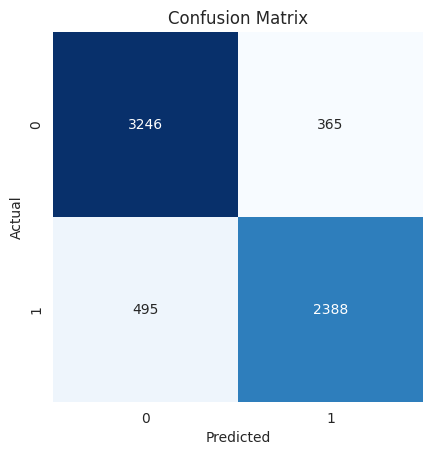

In [ ]:

sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=False, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность: {accuracy:.2f}")

Точность: 0.87


In [ ]:

from sklearn.metrics import  precision_score, recall_score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(f"Точность: {precision:.2f}")
print(f"Полнота: {recall:.2f}")

Точность: 0.87
Полнота: 0.83


In [ ]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)
print(f"F1-мера: {f1:.2f}")

F1-мера: 0.85


In [ ]:
df_copy.corr()

,id,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,1.000000,-0.006700,0.010211,0.006564,0.104721,0.095335,-0.030303,-0.002502,0.010389,0.001843,...,-0.001078,0.056544,0.041921,0.073085,0.079521,0.076587,0.020411,-0.009884,-0.029039,0.010965
Customer Type,-0.006700,1.000000,0.294210,-0.307827,0.105309,0.229306,-0.001333,0.206864,0.012340,0.001940,...,0.090418,0.044628,0.042757,-0.025470,0.027565,-0.025729,0.072150,-0.003200,-0.004701,0.179632
Age,0.010211,0.294210,1.000000,0.029773,0.140176,0.099409,0.009242,0.032449,0.013565,0.003308,...,0.068998,0.054977,0.033299,-0.049863,0.025388,-0.059083,0.048418,-0.004334,-0.007387,0.121697
Type of Travel,0.006564,-0.307827,0.029773,1.000000,0.546184,0.264559,0.109021,-0.246425,0.136350,0.026540,...,0.171904,0.072902,0.142869,0.039824,-0.014292,0.027235,0.106232,0.008003,0.006520,0.453268
Class,0.104721,0.105309,0.140176,0.546184,1.000000,0.449212,0.039247,-0.078724,0.112089,0.012686,...,0.203752,0.217525,0.210793,0.164997,0.150002,0.153875,0.149142,-0.010772,-0.015787,0.486815
Flight Distance,0.095335,0.229306,0.099409,0.264559,0.449212,1.000000,0.005007,-0.014401,0.062989,0.008410,...,0.137538,0.117880,0.136995,0.071549,0.075720,0.066355,0.105578,0.003446,0.000130,0.295292
Inflight wifi service,-0.030303,-0.001333,0.009242,0.109021,0.039247,0.005007,1.000000,0.349137,0.710684,0.347790,...,0.201782,0.113658,0.159699,0.118199,0.046046,0.108419,0.125768,-0.010078,-0.012251,0.280395
Departure/Arrival time convenient,-0.002502,0.206864,0.032449,-0.246425,-0.078724,-0.014401,0.349137,1.000000,0.440230,0.458439,...,-0.022326,0.060982,0.003373,0.065684,0.082461,0.067804,-0.007670,-0.000238,-0.001343,-0.064798
Ease of Online booking,0.010389,0.012340,0.013565,0.136350,0.112089,0.062989,0.710684,0.440230,1.000000,0.465514,...,0.044715,0.039988,0.116754,0.040685,-0.000108,0.035769,0.010974,-0.001062,-0.003155,0.157709
Gate location,0.001843,0.001940,0.003308,0.026540,0.012686,0.008410,0.347790,0.458439,0.465514,1.000000,...,-0.000340,-0.031606,-0.002428,-0.004395,-0.054954,-0.005129,-0.014195,0.008039,0.007760,-0.016627


## 12. Строим ROC-кривую

In [ ]:
from sklearn.metrics import roc_curve, auc
# Получаем предсказание вероятности для класса 1
y_score = model.predict_proba(X_test)[:, 1]
# Рассчитываем FPR, TPR и пороги
fpr, tpr, thresholds = roc_curve(y_test, y_score)
# (Опционально) Рассчитываем AUC (Area Under Curve) - площадь  под кривой
roc_auc = auc(fpr, tpr)

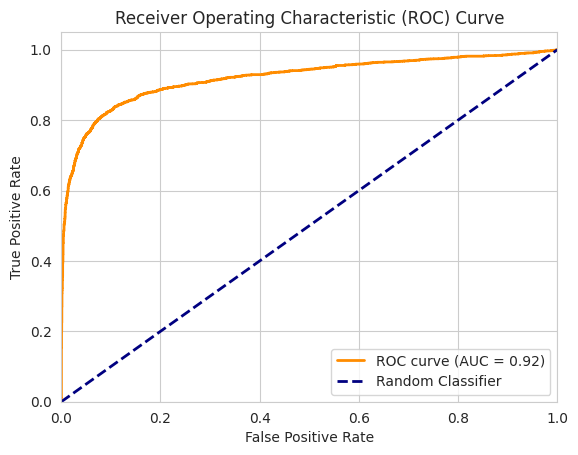

In [ ]:
## Строим график
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()